Avanced Python
========

Tips
--------
- underscore
  - separator in number ``` 10_000 ``` (only python 3.6)
  - last result in the interpreter ``` _ ```
  - I don't care ``` _ = f() ``` (dangerous with internationnaization)
  - weakly private ``` _something ``` (won't be imported with ```import *```)
  - avoid conflict ``` list_ ```
  - more private (mangled) ```__stuff```
  - magic methods (also mangled) ``` __init__```
  - for internationnalization ```_()```
- False tests
  - ```None```
  - ```0```
  - ```__nonzero__()```
  - ```__len__()```
- a is b : a et b are references to the same object
- unpacking dans les boucles 
  - zip ``` for i, j in zip(list1,list2):```
  - enumerate ``` for index, elem in enumerate(list1):```
- use collections.defaultdict(list) in order to initialize a dictonnary
- use exceptions
    - try is very fast but except is very slow
    - nice way to get out of multiples loops/functions at the same time
    - Allows you to be sure that an error had been taken care of
- **never** use a mutable optionnal arg
- use a shallow copy to modify a list in a loop (or be very carefull

In [1]:
from copy import copy
my_set={"einstein", "albert", "curie"}
for value in copy(my_set):
    if 'bert' in value:
        my_set.discard(value)
print(my_set)

{'curie', 'einstein'}


- Import mechanism :
  - Do the module exist ? If not, raise an exception
  - Do the module already imported ? If so, nothing to do
  - If not, do the module has already been "compiled" into .pyc ? If not, do it
  - Execute the module
- Be inform of the evolution of the language (PEP)
- Use decorator
  - debugging, timing, ...

In [2]:
from functools import wraps

def PrintAppel(f):
    def before_f():
        new_f.NbAppels += 1
        print("Entering {}".format(f.__name__))
        
    def after_f():
        print("Exiting {}".format(f.__name__))
        print("This was the call no {}".format(new_f.NbAppels))
    
    @wraps(f)
    def new_f(*args, **xargs):
        before_f()
        res = f(*args, **xargs)
        after_f()
        return res
    
    new_f.NbAppels = 0
    
    return new_f


In [3]:
@PrintAppel
def a_functon(x):
  return 2*x

In [5]:
a_functon(2)

Entering a_functon
Exiting a_functon
This was the call no 2


4

- Make use of classes In order to isolate your work (and your bugs)

In [6]:
class egg(object):                              # All objects derived from the same object "object"
    """ Full exemple of a class in python """
    total_number = 0                            # shared attribut between all instances **DANGER** ! 
  
    def __init__(self, number=1):               # constructor
        """ constructor from number """
        self.number = number                    # Good way of defining attributes
        egg.total_number += number
    
    @classmethod
    def from_recipe(cls, recipe):               # Alternative constructor
        """ constructor from recipe """
        return cls(recipe["oeufs"])
    
    def __del__(self):                          # destructor (rare)
        """ destructor """
        egg.total_number -= self.number

    def __str__(self):                          # convert your object into printable string
        """ egg to str convertor """
        return "On a total of {} eggs, I own {}".format(egg.total_number, self.number)
        
    def how_many(self):                         # a function of the instance
        """ Return the current number of eggs in the recipe """
        return self.number

    @staticmethod
    def how_many_egg():                          # a function on the class (rare)
        """ Return the total number of eggs for all recipes """
        return egg.total_number

if __name__ == "__main__":

    fried_egg = egg()
    omelette=egg(3)
    recipe_pancake={"oeufs":2, "lait":0.5, "farine":300}
    pancake = egg.from_recipe(recipe_pancake)
    print("Fried egg    : ", fried_egg)
    print("Omelette     : ", omelette)
    print("Pancake      : ", pancake)

    print("{:<12} : {:>5} | {}".format("egg","NaN", egg.how_many_egg()))
    print("{:<12} : {:>5} | {}".format("fried_egg",fried_egg.how_many(), fried_egg.how_many_egg()))
    print("{:<12} : {:>5} | {}".format("omelette",omelette.how_many(), omelette.how_many_egg()))
    print("{:<12} : {:>5} | {}".format("pancake",pancake.how_many(), pancake.how_many_egg()))
    del omelette
    print("{:<12} : {:>5} | {}".format("egg","NaN", egg.how_many_egg()))
    print("{:<12} : {:>5} | {}".format("fried_egg",fried_egg.how_many(), fried_egg.how_many_egg()))
    print("{:<12} : {:>5} | {}".format("pancake",pancake.how_many(), pancake.how_many_egg()))
    del fried_egg
    del pancake

    print()
    help(egg)

Fried egg    :  On a total of 6 eggs, I own 1
Omelette     :  On a total of 6 eggs, I own 3
Pancake      :  On a total of 6 eggs, I own 2
egg          :   NaN | 6
fried_egg    :     1 | 6
omelette     :     3 | 6
pancake      :     2 | 6
egg          :   NaN | 3
fried_egg    :     1 | 3
pancake      :     2 | 3

Help on class egg in module __main__:

class egg(builtins.object)
 |  Full exemple of a class in python
 |  
 |  Methods defined here:
 |  
 |  __del__(self)
 |      destructor
 |  
 |  __init__(self, number=1)
 |      constructor from number
 |  
 |  __str__(self)
 |      egg to str convertor
 |  
 |  how_many(self)
 |      Return the current number of eggs in the recipe
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  from_recipe(recipe) from builtins.type
 |      constructor from recipe
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 

- For launching external program :
  - ```subprocess.check_call(["cmd", "arg1", "arg2"])``` If you don't care about the output of the program
  - ```data = subprocess.check_output(["cmd", "arg1", "arg2"])``` otherwise (remember to decode)


In [7]:
import subprocess
data = subprocess.check_output(["ls", "-l", "--color"]).decode('utf-8')
print(data)

total 8228
-rw-rw-r-- 1 pouxa pouxa   29497 févr. 14 10:22 01.basics.ipynb
-rw-rw-r-- 1 pouxa pouxa 5957740 févr. 14 10:46 02.ecosystem.ipynb
-rw-rw-r-- 1 pouxa pouxa  301805 févr. 14 15:42 04.advanced.ipynb
-rw-rw-r-- 1 pouxa pouxa  259624 févr. 14 13:23 advanced-solution.ipynb
drwxrwxr-x 2 pouxa pouxa    4096 févr. 14 10:19 data
-rw-rw-r-- 1 pouxa pouxa     570 févr.  9 15:52 data.dat
-rw-rw-r-- 1 pouxa pouxa    6616 févr.  7 09:38 detect_peaks.py
-rw-rw-r-- 1 pouxa pouxa    1943 févr.  5 17:53 example_usage.py
-rw-rw-r-- 1 pouxa pouxa    2355 févr. 14 13:57 fortranModule.f90
drwxrwxr-x 2 pouxa pouxa    4096 févr. 14 10:15 images
-rw-rw-r-- 1 pouxa pouxa   35147 janv. 19 10:25 LICENSE
-rw-rw-r-- 1 pouxa pouxa   36044 févr. 14 10:46 lorentz_fit.svg
-rw-rw-r-- 1 pouxa pouxa   50673 févr.  2 15:44 maple.ipynb
-rw-r--r-- 1 pouxa pouxa   90650 févr. 14 15:08 Matlab_To_Python_Eden_BITTON.ipynb
-rwxrwxr-x 1 pouxa pouxa  130976 févr.  9 10:53 monModuleFortran.cpython-35m-x86_64-linux-gnu.so


Packaging
---------
- respect PEP (not only for prettyness)
- type hinting (that's new)
  - Almost totally ignored during execution
  - mypy (and more and more IDE) are capable of checking consistency
  - The typing module allows you to define complex types
  - More and more package are complient with this

In [8]:
def greeting(name: str) -> str:
    var = "Hello"  # type: str
    # python 3.7 : var = "Hello" : str
    
    return var + " " + name

- docstring (auto-documentation)
  - All fonctions
  - All classes
  - All modules (```__init__.py```)
  - All files
- pytest  (unit-testing)
  - auto discovery (use tests folders, test_truc function, and TestMachin classes)
  - allow parametrization

In [9]:
#ONLY for ipython
import ipytest.magics
import pytest
__file__ = '04.advanced.ipynb'

In [10]:
%%run_pytest[clean] -qq
#this was only for ipython

def test_sorted():
    assert sorted([5, 1, 4, 2, 3]) == [1, 2, 3, 4, 5]
    
# as does parametrize
@pytest.mark.parametrize('input,expected', [
                                            ([2, 1], [1, 2]),
                                            ('zasdqw', list('adqswz')),
                                            ]
                         )
def test_exemples(input, expected):
    actual = sorted(input)
    assert actual == expected

...                                                                                                           [100%]


- gettext (auto-internationnalization) ?
- argparse
- configParser
- logging
  - print -> go to console (for ordinary usage)
  - warning.warn -> go to console (usually once : for signaling a something the user should fix)
  - logging.level -> go anywhere you want (for detailled output and/or diagnostic)

In [11]:
import logging
import warnings


def prepare_logging():
    """
    Prepare all logging facilities
    
    This should be done in a separate module
    """

    # if not already done, initialize logging facilities
    logging.basicConfig()

    # create a logger for the current module
    logger = logging.getLogger(__name__)

    ## ONLY FOR IPYTHON
    # clean logger (ipython + multiple call)
    from copy import copy
    for handler in copy(logger.handlers):
        logger.removeHandler(handler)
    # Do not give propagate message to ipython (or else thy will be printed twice)
    logger.propagate=False
    ## ONLY FOR IPYTHON


    # optionnal : change format of the log
    logFormatter = logging.Formatter("%(asctime)s [%(threadName)-12.12s] [%(levelname)-5.5s]  %(message)s")

    # optionnal : create a handler for file output
    fileHandler = logging.FileHandler("{logPath}/{fileName}.log".format(logPath=".", fileName="test"))
    # optionnal : create a handler for console output
    consoleHandler = logging.StreamHandler()

    # optionnal : Apply formatter to both handles
    fileHandler.setFormatter(logFormatter)
    consoleHandler.setFormatter(logFormatter)

    # optionnal : attach handler to the logger
    logger.addHandler(fileHandler)
    logger.addHandler(consoleHandler)

    # what severity to log (default is NOTSET, i.e. all)
    logger.setLevel(logging.DEBUG)            # ALL
    fileHandler.setLevel(logging.INFO)        # NO DEBUG
    consoleHandler.setLevel(logging.WARNING)  # ONLY WARNING AND ERRORS

    return logger
    

def egg():
    warnings.warn("A warning only once")

    
if __name__ == "__main__":

    logger = prepare_logging()

    egg()

    logger.info('Start reading database')

    records = {'john': 55, 'tom': 66}

    logger.debug('Records: {}'.format(records))
    logger.info('Updating records ...')
    logger.warning("There is only 2 record !")
    logger.info('Saving records ...')
    logger.error("Something happend, impossible to save the records")
    logger.info('Restoring records ...')
    logger.critical("Database corrupted !")
    logger.info('End of program')

    egg()

04.advanced.ipynb:53: UserWarning: A warning only once
  "from copy import copy\n",
2018-02-14 15:44:26,674 [MainThread  ] [WARNI]  There is only 2 record !
2018-02-14 15:44:26,674 [MainThread  ] [ERROR]  Something happend, impossible to save the records
2018-02-14 15:44:26,675 [MainThread  ] [CRITI]  Database corrupted !



Performance
-----------
- profiling : Only optimize the bottlenecks !
  - timeit (for small snippets of code)

In [12]:
%timeit [1+i for i in range(1,10000)]
%timeit [1*i for i in range(1,10000)]
%timeit [1/i for i in range(1,10000)]
%timeit [1//i for i in range(1,10000)]

%timeit [1.+float(i) for i in range(1,10000)]
%timeit [1.*float(i) for i in range(1,10000)]
%timeit [1./float(i) for i in range(1,10000)]
%timeit [1.//float(i) for i in range(1,10000)]

503 µs ± 5.42 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
485 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
503 µs ± 1.65 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
417 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.62 ms ± 37.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.6 ms ± 5.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.61 ms ± 7.68 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.26 ms ± 23.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


  - cProfile (for real code)  
   ```python3 -m cProfile -o profile.pstats script.py```  
   ```gprof2dot -f pstats profile.pstats | dot -Tpng -o profile.png```

In [13]:
import numpy as np
import cProfile
import re

def function2(array):
    for i in range(500):
        array += 3
        array = array*2
    return array

def function1():
    array = np.random.randint(500000, size=5000000)
    array = function2(array)
    return sorted(array)

cProfile.run('function1()')

         7 function calls in 5.235 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    5.195    5.195 <ipython-input-13-08b1ce35b4bd>:11(function1)
        1    4.916    4.916    4.916    4.916 <ipython-input-13-08b1ce35b4bd>:5(function2)
        1    0.040    0.040    5.235    5.235 <string>:1(<module>)
        1    0.000    0.000    5.235    5.235 {built-in method builtins.exec}
        1    0.250    0.250    0.250    0.250 {built-in method builtins.sorted}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.029    0.029    0.029    0.029 {method 'randint' of 'mtrand.RandomState' objects}




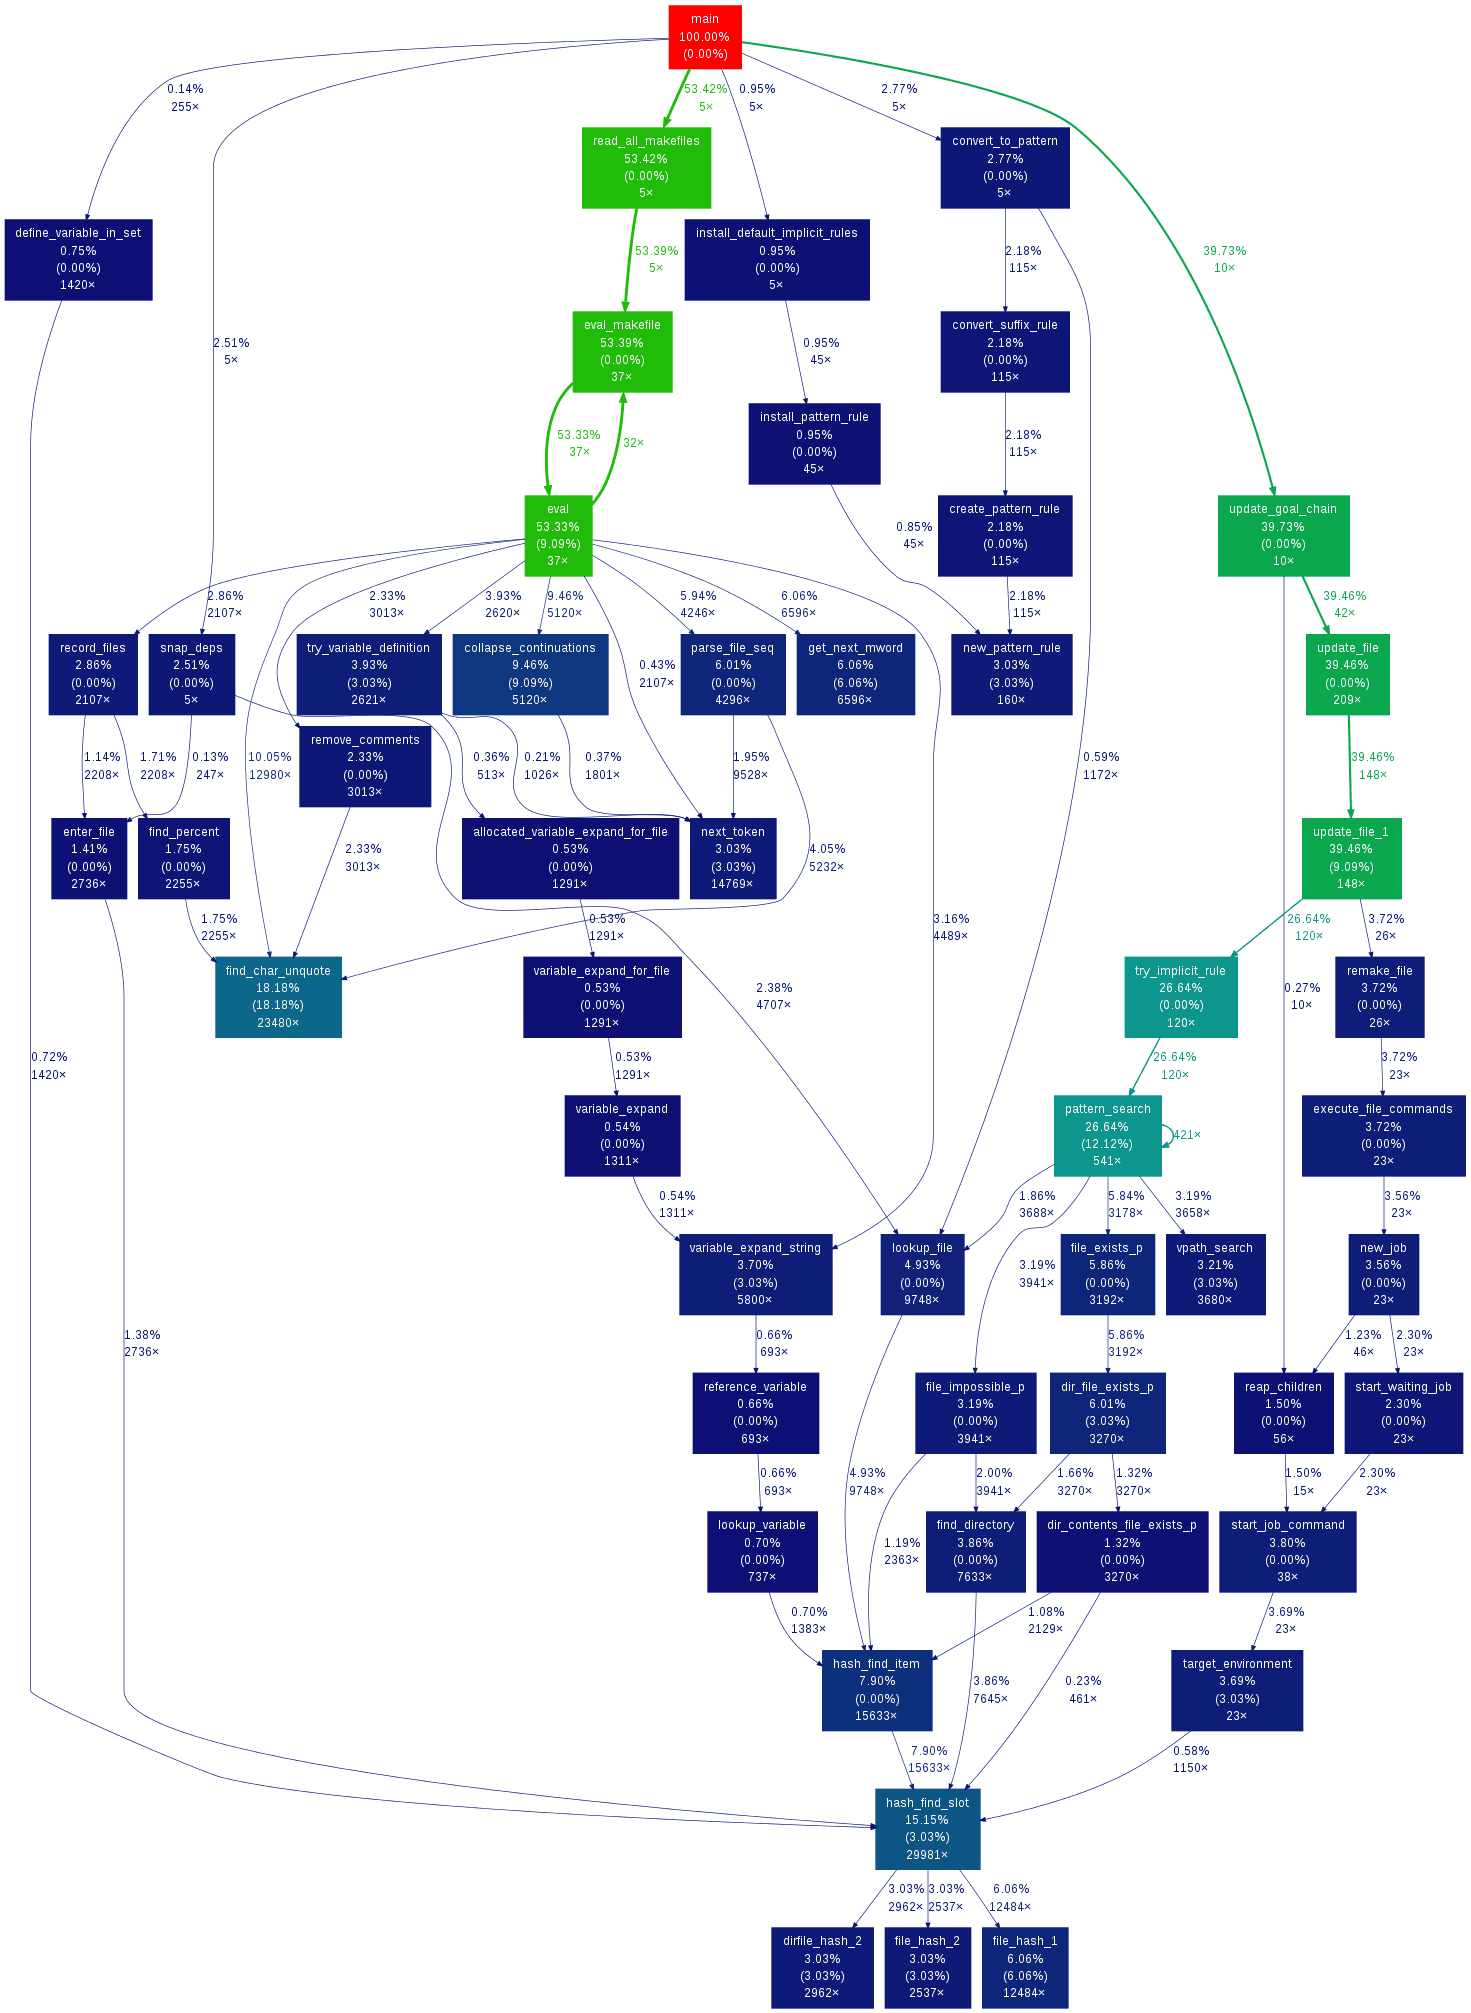

In [14]:
from IPython.display import Image
Image(filename='images/profile.png') 

- in sequential
    - small is beautifull (PEP 20)
    - inline manually
    - local is faster than global (and avoid dots)
    - choose the right data structure / algorithm
    - prefere numpy based array
    - avoid loops (vectorization using slice)
    - avoid copy of array
    - changing size of an array
    - use the out argument in numpy
    - IO cost a lot (avoid reading and writing into files)
- compiler
  - numexpr (only small expression)
  - f2py
    - included with numpy
    - compilation must be done separately
    - be carefull to the memory ordering
  - cython
  - numba

In [15]:
def function1(a,b):
    return a*b-4.1*a > 2.5*b

def function2(a,b):
    return np.sin(a) + np.arcsinh(a/b)


def convolve_python(f, g):
    # f is an image and is indexed by (v, w)
    # g is a filter kernel and is indexed by (s, t),
    #   it needs odd dimensions
    # h is the output image and is indexed by (x, y),

    if g.shape[0] % 2 != 1 or g.shape[1] % 2 != 1:
        raise ValueError("Only odd dimensions on filter supported")
        
    # smid and tmid are number of pixels between the center pixel
    # and the edge, ie for a 5x5 filter they will be 2.
    vmax = f.shape[0]
    wmax = f.shape[1]
    smax = g.shape[0]
    tmax = g.shape[1]
    
    smid = smax // 2
    tmid = tmax // 2

    # Allocate result image.
    h = np.zeros_like(f)
    
    # Do convolution
    for x in range(smid,vmax-smid):
        for y in range(tmid,wmax-tmid):
            # Calculate pixel value for h at (x,y). Sum one component
            # for each pixel (s, t) of the filter g.
            value = 0
            for s in range(smax):
                for t in range(tmax):
                    v = x - smid + s
                    w = y - tmid + t
                    value += g[s, t] * f[v, w]
            h[x, y] = value
    return h

In [16]:
fsource = """
    module fortranmodule
    implicit none
    contains
    
    subroutine function1(a,b,c,n)
    implicit none
    integer(kind=8), intent(in) :: n
    double precision,intent(in) :: a(n)
    double precision,intent(in) :: b(n)
    logical,intent(out) :: c(n)

    c = a*b-4.1*a > 2.5*b

    end subroutine function1
    
    subroutine function2(a,b,c,n)
    implicit none
    integer(kind=8), intent(in) :: n
    double precision,intent(in) :: a(n)
    double precision,intent(in) :: b(n)
    double precision,intent(out) :: c(n)

    c = sin(a) + asinh(a/b)

    end subroutine function2
    
    
    subroutine convolve_fortran(f,g,vmax,wmax,smax,tmax,h,err)
    use OMP_LIB
    implicit none
    integer(kind=8),intent(in)  :: vmax,wmax,smax,tmax
    integer(kind=8),intent(in)  :: f(vmax,wmax), g(smax,tmax)
    integer(kind=8),intent(out) :: h(vmax,wmax)

    integer(kind=8),intent(out) :: err
    integer(kind=8) :: smid,tmid
    integer(kind=8) :: value
    integer(kind=8) :: x, y, s, t, v, w
    
    ! f is an image and is indexed by (v, w)
    ! g is a filter kernel and is indexed by (s, t),
    !   it needs odd dimensions
    ! h is the output image and is indexed by (v, w),

    err = 0
    if (modulo(smax,2) /= 1 .or. modulo(tmax,2) /= 1) then
        err = 1
        return
    endif
        
    ! smid and tmid are number of pixels between the center pixel
    ! and the edge, ie for a 5x5 filter they will be 2.  
    smid = smax / 2
    tmid = tmax / 2
    
    CALL OMP_SET_NUM_THREADS(8)
    
    h = 0
    ! Do convolution
    ! warning : memory layout is different in fortran
    ! warning : array start at 1 in fortran

    !$OMP PARALLEL DO DEFAULT(SHARED) COLLAPSE(1) &
    !$OMP PRIVATE(value,v,w)
    do y=tmid+1,wmax-tmid
        do x=smid+1,vmax-smid
            ! Calculate pixel value for h at (x,y). Sum one component
            ! for each pixel (s, t) of the filter g.
            
            value = 0
            do t=1,tmax
                do s=1,smax
                    v = x - smid + s -1
                    w = y - tmid + t -1
                    
                    value = value + g(s, t) * f(v, w)
                enddo
            enddo
            h(x, y) = value
        enddo
    enddo
    !$OMP END PARALLEL DO
    return
    end subroutine convolve_fortran
    end module fortranmodule
    """

with open("fortranModule.f90",'w') as f:
    for line in fsource:
        f.write(line)

import subprocess
try:
    data = subprocess.check_output(["venv/bin/f2py",
#    data = subprocess.check_output(["/home/pythonstudent/.local/bin/f2py",
                                    "-c", "fortranModule.f90",
                                    "-m", "myfortranmodule",
                                    "--opt='-Ofast -march=native -fopenmp'", "--noarch", "-lgomp",
#                                    "--debug-capi", "--debug",
                                    "-DF2PY_REPORT_ON_ARRAY_COPY=1"
                                   ]).decode('utf-8')
except subprocess.CalledProcessError as e:
    print(e.output.decode('utf-8'))
else:
    #print(data)
    print("compilation OK")   

compilation OK


In [17]:
from myfortranmodule import fortranmodule

def convolve_fortran(f,g):
    h, err = fortranmodule.convolve_fortran(f,g)
    if err:
        print(err)
        raise ValueError("FORTRAN ERROR ! (Probably : Only odd dimensions on filter supported)")
    return h

In [18]:
%load_ext Cython

In [19]:
%%cython --compile-args=-fopenmp --link-args=-fopenmp
import numpy as np
cimport numpy as np
cimport cython
from libc.math cimport sin
from libc.math cimport asinh
from cython.parallel cimport parallel, prange

@cython.boundscheck(False) # turn off bounds-checking for entire function
@cython.wraparound(False)  # turn off negative index wrapping for entire function
def cfunction1(double[::1] a, double[::1] b):
    cdef long n = a.shape[0]
    cdef long m = b.shape[0]
    
    if n != m :
        raise ValueError("Arrays must have the same dimension")
        
    cdef long[:] res = np.empty([n], dtype=long)
    
    cdef long i
    for i in range(n):
        res[i] = a[i]*b[i]-4.1*a[i] > 2.5*b[i]
    return res

@cython.boundscheck(False) # turn off bounds-checking for entire function
@cython.wraparound(False)  # turn off negative index wrapping for entire function
def cfunction2(double[::1] a, double[::1] b):
    cdef long n = a.shape[0]
    cdef long m = b.shape[0]
    
    if n != m :
        raise ValueError("Arrays must have the same dimension")
        
    cdef double[:] res = np.empty([n], dtype=np.double)
    
    cdef long i
    for i in range(n):
        res[i] = sin(a[i]) + asinh(a[i]/b[i])
    return res


@cython.boundscheck(False) # turn off bounds-checking for entire function
@cython.wraparound(False)  # turn off negative index wrapping for entire function
def convolve_cython(long[:,::1] f, long[:,::1] g):
    # f is an image and is indexed by (v, w)
    # g is a filter kernel and is indexed by (s, t),
    #   it needs odd dimensions
    # h is the output image and is indexed by (x, y),
    if g.shape[0] % 2 != 1 or g.shape[1] % 2 != 1:
        raise ValueError("Only odd dimensions on filter supported")

    # smid and tmid are number of pixels between the center pixel
    # and the edge, ie for a 5x5 filter they will be 2.
    
    cdef long vmax = f.shape[0]
    cdef long wmax = f.shape[1]
    cdef long smax = g.shape[0]
    cdef long tmax = g.shape[1]
    cdef long smid = smax // 2
    cdef long tmid = tmax // 2
    
    # Allocate result image.
    cdef long[:,::1] h = np.zeros([vmax, wmax], dtype=long)

    cdef long value
    cdef long x, y, s, t, v, w

    # Do convolution
    with nogil, parallel(num_threads=8):
        for x in prange(smid,vmax-smid):
            for y in range(tmid,wmax-tmid):
                # Calculate pixel value for h at (x,y). Sum one component
                # for each pixel (s, t) of the filter g.
                value = 0
                for s in range(smax):
                    for t in range(tmax):
                        v = x - smid + s
                        w = y - tmid + t
                        value += g[s, t] * f[v, w]
                h[x, y] += value
    return h

In [20]:
import numba as nb


@nb.jit(nopython=True, nogil=True, cache=False, parallel=True)
def nb_function1(a, b):
    return a*b-4.1*a > 2.5*b

@nb.jit(nopython=True, nogil=True, cache=False, parallel=True)
def nb_function2(a, b):
    return np.sin(a) + np.arcsinh(a/b)

@nb.stencil(standard_indexing=("g",),neighborhood=((-4, 4),(-4, 4)))
def convolve_kernel(f, g):

    smax = g.shape[0]
    tmax = g.shape[1]

    smid = smax // 2
    tmid = tmax // 2
    
    h = 0
    for s in range(smax):
        for t in range(tmax):
            h += g[s, t] * f[s-smid, t-tmid]   
    return h

@nb.jit(nopython=True, nogil=True, cache=False, parallel=True)
def convolve_numba(f, g):

    if g.shape[0] % 2 != 1 or g.shape[1] % 2 != 1:
        raise ValueError("Only odd dimensions on filter supported")

    return convolve_kernel(f,g)

#apply it for compilation
N = 10
f = np.arange(N*N, dtype=np.int).reshape((N,N))
g = np.arange(81, dtype=np.int).reshape((9, 9))
d = convolve_numba(f, g)
a = np.arange(1,5)
b = np.arange(1,5)
nb_function1(a, b)
nb_function2(a, b)
print("compilation OK")

compilation OK


In [21]:
import numpy as np
import numexpr as ne
from myfortranmodule import fortranmodule

In [22]:
print("Easy cases")
a = np.arange(1,1e6)   # Choose large arrays for better speedups
b = np.arange(1,1e6)

print("With numpy")
%timeit function1(a, b)
%timeit function2(a, b)

print("With numexpr")
%timeit ne.evaluate('a*b-4.1*a > 2.5*b')  
%timeit ne.evaluate("sin(a) + arcsinh(a/b)") # numexpr is multithreaded

print("With fortran")
%timeit  c = fortranmodule.function1(a, b)
%timeit  d = fortranmodule.function2(a, b)

print("With cython")
%timeit  cfunction1(a, b)
%timeit  cfunction2(a, b)

print("With numba")
%timeit  nb_function1(a, b)
%timeit  nb_function2(a, b) # numba is multithreaded

Easy cases
With numpy
6.8 ms ± 293 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
61.8 ms ± 227 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
With numexpr
1.03 ms ± 6.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
11.8 ms ± 186 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
With fortran
1.13 ms ± 10 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
62.1 ms ± 273 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
With cython
1.56 ms ± 56.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
64 ms ± 1.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
With numba
1.12 ms ± 66.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
15.2 ms ± 2.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
import numpy as np
print("Convolution")
N = 200
f = np.arange(N*N, dtype=np.int).reshape((N,N))
g = np.arange(81, dtype=np.int).reshape((9, 9))
ft = np.asfortranarray(f)                   # memory ordering for fortran
gt = np.asfortranarray(g)

print("With numpy")
%timeit convolve_python(f, g)
a = convolve_python(f, g)

print("With fortran")
%timeit convolve_fortran(ft, gt)
b = convolve_fortran(ft, gt)
print(np.allclose(a,b))

print("With cython")
%timeit convolve_cython(f, g)
c = convolve_cython(f, g)
print(np.allclose(a,c))

print("With numba")
%timeit convolve_numba(f, g)
d = convolve_numba(f, g)
print(np.allclose(a,d))

Convolution
With numpy
1.24 s ± 18.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
With fortran
946 µs ± 95.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
True
With cython
627 µs ± 69.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
True
With numba
1.43 ms ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
True


In [24]:
print("Convolution2")
N = 2000
f = np.arange(N*N, dtype=np.int).reshape((N,N))
g = np.arange(81, dtype=np.int).reshape((9, 9))
ft = np.asfortranarray(f)                   # memory ordering for fortran
gt = np.asfortranarray(g)

print("With fortran")
%timeit convolve_fortran(ft, gt)
a = convolve_fortran(ft, gt)
#print(a)

print("With cython")
%timeit convolve_cython(f, g)
b = convolve_cython(f, g)
print(np.allclose(a,b))
#print(b)

print("With numba")
%timeit convolve_numba(f, g)
c = convolve_numba(f, g)
print(np.allclose(a,c))

Convolution2
With fortran
90.8 ms ± 4.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
With cython
60.1 ms ± 203 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
True
With numba
99 ms ± 2.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
True


- parallelism
  - cuda

In [25]:
"""
CUDA DOESN'T WORK ON THE VIRTUAL MACHINE
YOU ARE WELCOME TO TRY THIS ON YOU OWN COMPUTER
"""
from string import Template

cuda_src_template = Template("""
// Cuda splitting
#define MTB ${max_threads_per_block}
#define MBP ${max_blocks_per_grid}

// Array size
#define fx ${fx}
#define fy ${fy}
#define gx ${gx}
#define gy ${gy}

// Macro for converting subscripts to linear index:
#define f_INDEX(i, j) (i)*(fy)+(j)

// Macro for converting subscripts to linear index:
#define g_INDEX(i, j) (i)*(gy)+(j)

__global__ void convolve_cuda(long *f, long *g, long *h) {

    unsigned int idx = blockIdx.y*MTB*MBP + blockIdx.x*MTB+threadIdx.x;

    // Convert the linear index to subscripts:
    unsigned int i = idx/fy;
    unsigned int j = idx%fy;

    long smax = gx;
    long tmax = gy;

    long smid = smax / 2;
    long tmid = tmax / 2;

    if (smid <= i && i < fx-smid) {
    if (tmid <= j && j < fy-tmid) {

        h[f_INDEX(i,j)] = 0.;
        
        for (long s=0;s<smax;s++)
            for (long t=0;t<tmax;t++)
                h[f_INDEX(i,j)] += g[g_INDEX(s, t)] * f[f_INDEX(i+s-smid, j+t-tmid)];
    
    }
    }
}
""")

In [26]:
"""
CUDA DOESN'T WORK ON THE VIRTUAL MACHINE
YOU ARE WELCOME TO TRY THIS ON YOU OWN COMPUTER
"""
import skcuda.misc as misc
import pycuda.autoinit
device = pycuda.autoinit.device
max_threads_per_block, _, max_grid_dim = misc.get_dev_attrs(device)
max_blocks_per_grid = max(max_grid_dim)

In [27]:
"""
CUDA DOESN'T WORK ON THE VIRTUAL MACHINE
YOU ARE WELCOME TO TRY THIS ON YOU OWN COMPUTER
"""
from functools import partial
from pycuda.compiler import SourceModule

cuda_src = cuda_src_template.substitute(max_threads_per_block=max_threads_per_block,
                                        max_blocks_per_grid=max_blocks_per_grid,
                                        fx=f.shape[0], fy=f.shape[1],
                                        gx=g.shape[0], gy=g.shape[1]
                                       )
cuda_module = SourceModule(cuda_src, options= ["-O3", "-use_fast_math", "-default-stream=per-thread"])
print("Compilation OK")

__convolve_cuda = cuda_module.get_function('convolve_cuda')

block_dim, grid_dim = misc.select_block_grid_sizes(device, f.shape)
_convolve_cuda = partial(__convolve_cuda,
                         block=block_dim,
                         grid=grid_dim)

Compilation OK


In [28]:
"""
CUDA DOESN'T WORK ON THE VIRTUAL MACHINE
YOU ARE WELCOME TO TRY THIS ON YOU OWN COMPUTER
"""
import pycuda.gpuarray as gpuarray

def convolve_cuda(f_gpu,g_gpu):
    h_gpu = gpuarray.zeros_like(f_gpu)
    _convolve_cuda(f_gpu, g_gpu, h_gpu)
    return h_gpu.get()

In [29]:
"""
CUDA DOESN'T WORK ON THE VIRTUAL MACHINE
YOU ARE WELCOME TO TRY THIS ON YOU OWN COMPUTER
"""
if __name__ == "__main__":

    f_gpu = gpuarray.to_gpu(f)
    g_gpu = gpuarray.to_gpu(g)

    %timeit convolve_cuda(f_gpu, g_gpu)
    d = convolve_cuda(f_gpu, g_gpu)
    print(np.allclose(a,d))

36.8 ms ± 1.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
True


- asyncio
    - not a real parallelism
    - effective for io-bound tasks (web)
    - not very interesting here
- multithreading
    - more parallelism (GIL)
    - shared memory
- multiprocessing
    - real parallelism
    - limited to one computer
    - two main implementation
        - multiprocessing (stdlib) which is flexible
        - joblib which is relatively easy to use
- mpi (mpi4py)
    - real parallelism
    - unlimited
    - relatively complex to use (same as in C, fortran, ...)

In [30]:
import time
import numpy as np
def heavy_fonction(i):
    t = np.random.rand()/10
    time.sleep(t)
    return i,t
    

In [31]:
from math import sqrt
from joblib import Parallel, delayed

if __name__ == "__main__":

    tic = time.time()
    res = Parallel(n_jobs=-1)(delayed(heavy_fonction)(i) \
                                for i in range(2000))
    tac = time.time()
    index, times = np.asarray(res).T
    print(tac - tic)
    print(times.sum())

13.678255796432495
105.68018766378466


In [32]:
from threading import Thread, RLock

N = 2000
N_t = 10
input_list = np.arange(N,dtype=int)
current = 0
nprocs = 8
output_list = np.empty(N)

lock = RLock()

class ThreadJob(Thread):
    def run(self):
        global current
        """Code à exécuter pendant l'exécution du thread."""
        while current < N:
            
            with lock:
                position = current
                current += N_t
            
            fin = min(position+N_t+1,N)
            
            for i in range(position, fin):
                j,t = heavy_fonction(input_list[i])
                output_list[j] = t

if __name__ == "__main__":

    # Threads creation
    threads = [ThreadJob() for i in range(nprocs)]

    tic = time.time()
    # Threads starts
    for thread in threads:
        thread.start()

    # Waiting that all thread have finish
    for thread in threads:
        thread.join()
    tac = time.time()


    print(tac - tic)
    print(output_list.sum())

14.301809310913086
101.88306308177806


In [33]:
import multiprocessing as mp
from queue import Empty

def process_job(q,r):
    while True:
        try:
            i = q.get(block=False)
            r.put(heavy_fonction(i))
        except Empty:
            if q.empty():
                if q.qsize() == 0:
                    break

if __name__ == "__main__":

    # Define an output queue
    r = mp.Queue()

    # Define an input queue
    q = mp.Queue()

    for i in range(2000):
        q.put(i)

    nprocs = 8
    # Setup a list of processes that we want to run
    processes = [mp.Process(target=process_job, args=(q, r)) for i in range(nprocs)]

    tic = time.time()

    # Run processes
    for p in processes:
        p.start()

    # Get process results from the output queue
    results = np.empty(2000)
    for i in range(2000):
        j,t = r.get()
        results[j] = t

    tac = time.time()

    # Exit the completed processes
    for p in processes:
        p.join()

    print(tac - tic)
    print(results.sum())

13.22964882850647
104.25768613665521


### Exercise
The following code read an image in pgm format (ascii) and store it in a 2D list.  
For each pixel of the image a kernel get all neighbors (9 counting the pixel itself) and apply a computation.  
Analyse the performance of the code, identify bottleneck and try to optimize it.

Reading Files
Computing


<IPython.core.display.Javascript object>


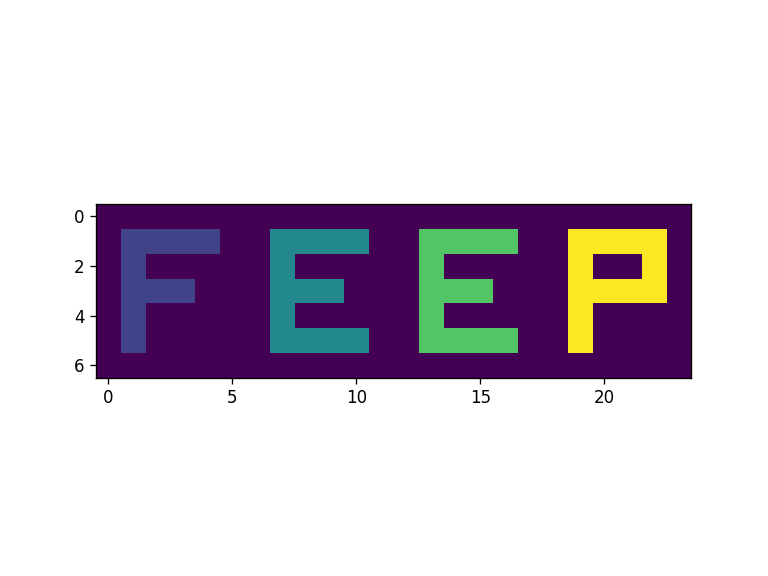

<IPython.core.display.Javascript object>


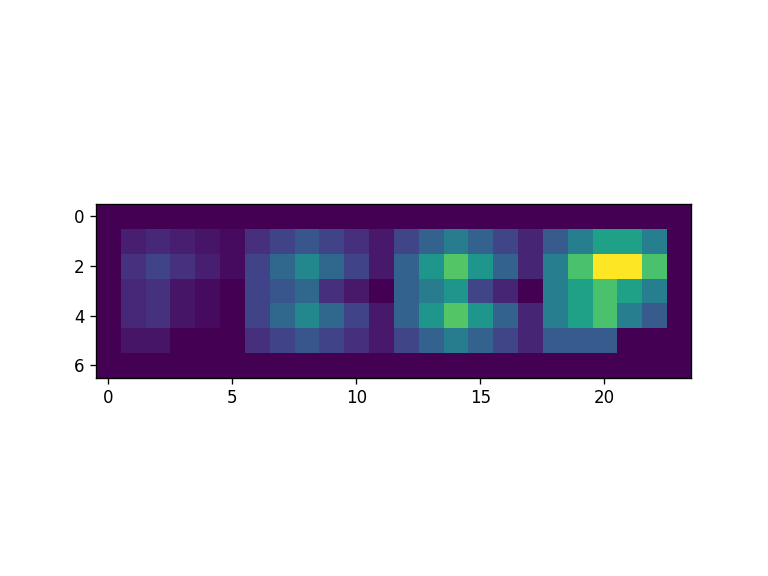

In [34]:
%matplotlib notebook 

import math
import matplotlib.pyplot as plt

def get_description(filename):
    """
    Read the header part of the file
    """
    f=open(filename,'r')
    nline=0
    description={}
    while nline <3:
        line=f.readline()
        if line[0]== '#':
            continue
        nline+=1
        if nline == 1:
            description['format']=line.strip()
        elif nline == 2:
            description['dimension']=int(line.split()[1]),int(line.split()[0])
        elif nline ==3:
            description['deep']=int(line.strip())
    f.close()
    return description

def get_value(filename,coord):
    """
    Get value at coord in an image in the PGM format
    
    The main problem here is that the file have a limited width, and the values are wrapped
    Thus, the value at coord 12,32 might be in the 24,6 in the file
    """
    description=get_description(filename)
    xdim,ydim=description['dimension']
    i=coord[0]
    j=coord[1]
    f=open(filename,'r',encoding='utf-8')
    nline=0
    while nline < 3:
        line=f.readline()
        if line[0]=='#':
            continue
        nline+=1
    #here we are at coordinate (0,0)
    icur,jcur=0,0
    test=True
    while(test):
        values=f.readline().split()
        nvalues=len(values)
        if (icur==i):
            if (jcur+nvalues>j):
                jvalues=j-jcur
                value=values[jvalues]
                test=False
            else:
                jcur+=nvalues
        else:
            jcur+=nvalues
        if (jcur>=ydim):
            icur+=jcur//ydim
            jcur=jcur%ydim
    f.close()
    return int(value)


def read_file(filename):
    """
    Read an image in the PGM format
    """
    description=get_description(filename)
    values=[]
    for i in range(description['dimension'][0]):
        values.append([])
        for j in range(description['dimension'][1]):
            values[i].append(get_value(filename,(i,j)))

    return values

def get_neighbors(tab,i,j):
    neigh=[]
    for jrange in [-1,0,1]:
        for irange in [-1,0,1]:
            neigh.append(tab[i+irange][j+jrange])
    return neigh

def compute_wtf(neigh):
    value=1.
    for i in range(len(neigh)):
        value*=math.exp(neigh[i])**(1/len(neigh))
    value = math.log(value)
        
    return float(value)

def kernel(tab):
    """
    Apply compute_wtf on each pixel except boundary
    """
    xdim=len(tab)
    ydim=len(tab[0])
    result=[]
    #1st line
    result.append([0])
    for jrange in range(1,ydim):
        result[0].append(0)
    for irange in range(1,xdim-1):
        #1st column
        result.append([0])
        for jrange in range(1,ydim-1):
            neigh=get_neighbors(tab,irange,jrange)
            result[irange].append(compute_wtf(neigh))
        #last colum
        result[irange].append(0)
    #last line
    result.append([])
    for jrange in range(ydim):
        result[xdim-1].append(0)
    return result

def job(data):
    """
    Apply kernel of each image
    """
    results=[]
    for image in data:
        results.append(kernel(image))
    return results

def init(files):
    """
    Read all files
    """
    data = []
    for file in files:
        data.append(read_file(file))
        
    return data  

def plot(data):
    nimages = len(data)
    
    if nimages>1:
        fig, axes = plt.subplots(nimages,1)
        for image, ax in zip(data,axes):
            ax.imshow(image)
    else:
        plt.figure()
        plt.imshow(data[0])
    
    plt.show()


files=["data/test.pgm"]
   
if __name__ == "__main__":

    print("Reading Files")
    data = init(files)

    print("Computing")
    result = job(data)

    plot(data)
    plot(result)


Try to optimize this code.  
You can apply your code on the following images :
- data/test.pgm
- data/test32.pgm
- data/brain_604.ascii.pgm
- data/apollonian_gasket.ascii.pgm
- data/dla.ascii.pgm

For reference, the timing on my computer are :  
For data/test.pgm

On my computer :
```
Reading Files
6.67 ms ± 262 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Computing
503 µs ± 5.41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
```

My solution
```
Reading Files
83.9 µs ± 3.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Computing
255 µs ± 19.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
```

And, the bigger the image, the bigger the gain !

<button data-toggle="collapse" data-target="#hints">Hints</button>
<div id="hints" class="collapse">
    
Part 1
- Open input file only once
- Avoid appending data
- Use numpy array for data storage
- What is really doing the compute wtf function ?

Part 2
- compile the compute part

Part 3
- parallelize the work on each image


<button data-toggle="collapse" data-target="#optim1">Solution : Part 1</button>
<div id="optim1" class="collapse">
```python
import numpy as np
from copy import deepcopy

def get_description(file):
    """
    Read the header part of the file

    And leave the file at the end of header (start of values)
    """
    # return to begining
    file.seek(0)
    nline=0
    description={}
    while nline <3:
        line=file.readline()
        if line[0]== '#':
            continue
        nline+=1
        if nline == 1:
            description['format']=line.strip()
        elif nline == 2:
            description['dimension']=int(line.split()[1]),int(line.split()[0])
        elif nline ==3:
            description['deep']=int(line.strip())
    return description

def read_values(file, description):
    """
    Read all the values directly
    """
    # pre-allocate the array
    nx,ny = description['dimension']
    values = np.empty((nx*ny))
    i = 0
    for line in file:
        if line[0]== '#':
            continue
        vals = line.split()
        nvals = len(vals)
        values[i:i+nvals] = [int(v) for v in vals]
        i += nvals
    return values.reshape((nx,ny))

def read_file(filename):
    """
    Read an image in the PGM format
    """
    # open the file once
    with open(filename,'r',encoding="utf-8") as file:

        # read the header part
        description = get_description(file)

        # read the values
        values = read_values(file,description)
    return values


def init(files):
    """
    Read all files
    """
    data = []
    for file in files:
        data.append(read_file(file))

    return data
    
#prepare result array
result = deepcopy(data)
```

<button data-toggle="collapse" data-target="#optim2">Solution : Part 2</button>
<div id="optim2" class="collapse">

In the python part :
-----------------------
```python
def kernel(i):
    """
    Apply compute_wtf on each pixel except boundary
    """
    global data, result,t_omp
    result[i] = ckernel(data[i],nt_omp)
```

In a new cell :
-----------------
``` %load_ext Cython ```
 
In a new cell :
-----------------
```cython
%%cython --compile-args=-fopenmp --link-args=-fopenmp
## --compile-args=-DCYTHON_TRACE_NOGIL=1 --compile-args=-DCYTHON_TRACE=1 
# cython: language_level=3
# cython: boundscheck=False
# cython: wraparound=False
# cython: initializedcheck=False
## cython: profile=False
## cython: linetrace=False
# cython: binding=True
import numpy as np
cimport numpy as np
cimport cython
from cython.parallel cimport parallel, prange

def ckernel(double[:,::1] data,long nt):
    cdef long n = data.shape[0]
    cdef long m = data.shape[1]

    cdef double[:,::1] res = np.zeros([n,m], dtype=np.double)
    cdef double value

    cdef long i, j,s,t
    with nogil,parallel(num_threads=nt):
        for i in prange(1,n-1):
            for j in range(1,m-1):
                value = 0
                for s in range(-1,2):
                    for t in range(-1,2):
                        value += data[i+s, j+t]
                res[i, j] += value / 9
    return res
```

<button data-toggle="collapse" data-target="#optim3">Solution : Part 3</button>
<div id="optim3" class="collapse">
```python
from threading import Thread, RLock
import os

nprocs = os.cpu_count()
nt_omp = nprocs//2
nt_job =nprocs - nt_omp

result = []
data = []

current = 0

verrou = RLock()

class ThreadJob(Thread):
    def run(self):
        global current,verrou
        """Code à exécuter pendant l'exécution du thread."""
        while current < len(data):

            with verrou:
                position = current
                current += 1

            kernel(position)

def job(data):
    """
    Apply kernel on each image
    """
    global current

    current = 0
    # Création des threads
    threads = [ThreadJob() for i in range(nt_job)]

    # Lancement des threads
    for thread in threads:
        thread.start()

    # Attend que les threads se terminent
    for thread in threads:
        thread.join()


#sort data bigger first for better equilibrium
data = sorted(data,key=np.size, reverse=True)
```

<button data-toggle="collapse" data-target="#optimfull">Full solution</button>
<div id="optimfull" class="collapse">
Cell 1 :
--------
```%load_ext Cython```
    
Cell 2 :
--------
```cython
%%cython --compile-args=-fopenmp --link-args=-fopenmp
## --compile-args=-DCYTHON_TRACE_NOGIL=1 --compile-args=-DCYTHON_TRACE=1 
# cython: language_level=3
# cython: boundscheck=False
# cython: wraparound=False
# cython: initializedcheck=False
## cython: profile=False
## cython: linetrace=False
# cython: binding=True
import numpy as np
cimport numpy as np
cimport cython
from cython.parallel cimport parallel, prange

def ckernel(double[:,::1] data,long nt):
    cdef long n = data.shape[0]
    cdef long m = data.shape[1]
    
    cdef double[:,::1] res = np.zeros([n,m], dtype=np.double)
    cdef double value
    
    cdef long i, j,s,t
    with nogil,parallel(num_threads=nt):
        for i in prange(1,n-1):
            for j in range(1,m-1):
                value = 0
                for s in range(-1,2):
                    for t in range(-1,2):
                        value += data[i+s, j+t]
                res[i, j] += value / 9
    return res
```

Cell 3 :
--------
```python
%matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt
from threading import Thread, RLock
from copy import deepcopy
import os

nprocs = os.cpu_count()
nt_omp = nprocs//2
nt_job =nprocs - nt_omp

result = []
data = []

current = 0

verrou = RLock()

class ThreadJob(Thread):
    def run(self):
        global current,verrou
        """Code à exécuter pendant l'exécution du thread."""
        while current < len(data):
            
            with verrou:
                position = current
                current += 1
            
            kernel(position)

def get_description(file):
    """
    Read the header part of the file
    
    And leave the file at the end of header (start of values)
    """
    # return to begining
    file.seek(0)
    nline=0
    description={}
    while nline <3:
        line=file.readline()
        if line[0]== '#':
            continue
        nline+=1
        if nline == 1:
            description['format']=line.strip()
        elif nline == 2:
            description['dimension']=int(line.split()[1]),int(line.split()[0])
        elif nline ==3:
            description['deep']=int(line.strip())
    return description
        
def read_values(file, description):
    """
    Read all the values directly
    """
    # pre-allocate the array
    nx,ny = description['dimension']
    values = np.empty((nx*ny))
    i = 0
    for line in file:
        if line[0]== '#':
            continue
        vals = line.split()
        nvals = len(vals)
        values[i:i+nvals] = [int(v) for v in vals]
        i += nvals
    return values.reshape((nx,ny))

def read_file(filename):
    """
    Read an image in the PGM format
    """
    # open the file once
    with open(filename,'r',encoding="utf-8") as file:

        # read the header part
        description = get_description(file)

        # read the values
        values = read_values(file,description)
    return values

def kernel(i):
    """
    Apply compute_wtf on each pixel except boundary
    """
    global data, result,t_omp
    result[i] = ckernel(data[i],nt_omp)

def job(data):
    """
    Apply kernel of each image
    """
    global current
    
    current = 0
    # Création des threads
    threads = [ThreadJob() for i in range(nt_job)]

    # Lancement des threads
    for thread in threads:
        thread.start()

    # Attend que les threads se terminent
    for thread in threads:
        thread.join()


def init(files):
    """
    Read all files
    """
    data = []
    for file in files:
        data.append(read_file(file))
    
    return data

def plot(data):
    nimages = len(data)
    if nimages>1:
        fig, axes = plt.subplots(nimages,1)
        for image, ax in zip(data,axes):
            ax.imshow(image)
    else:
        plt.figure()
        plt.imshow(data[0])
    
    plt.show()
    

files = ["data/test.pgm",
         "data/test32.pgm",
         "data/brain_604.ascii.pgm",
         "data/apollonian_gasket.ascii.pgm",
         "data/dla.ascii.pgm",
        ]

if __name__ == "__main__":
    data = init(files)

    #sort data bigger first for better equilibrium
    data = sorted(data,key=np.size, reverse=True)

    #prepare result array
    result = deepcopy(data)

    #plot(data)
    plot(result)
```